A* Star Huristic P

#1

In [ ]:
def aStarAlgo(start_node, stop_node):
    open_set = set(start_node)
    closed_set = set()
    g = {}               #store distance from starting node
    parents = {}         # parents contains an adjacency map of all nodes
    #distance of starting node from itself is zero
    g[start_node] = 0
    #start_node is root node i.e it has no parent nodes
    #so start_node is set to its own parent node
    parents[start_node] = start_node
    while len(open_set) > 0:
        n = None
        #node with lowest f() is found
        for v in open_set:
            if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n = v
        if n == stop_node or Graph_nodes[n] == None:
            pass
        else:
            for (m, weight) in get_neighbors(n):
                #nodes 'm' not in first and last set are added to first
                #n is set its parent
                if m not in open_set and m not in closed_set:
                    open_set.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight
                #for each node m,compare its distance from start i.e g(m) to the
                #from start through n node
                else:
                    if g[m] > g[n] + weight:
                        #update g(m)
                        g[m] = g[n] + weight
                        #change parent of m to n
                        parents[m] = n
                        #if m in closed set,remove and add to open
                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)
        if n == None:
            print('Path does not exist!')
            return None

        # if the current node is the stop_node
        # then we begin reconstructin the path from it to the start_node
        if n == stop_node:
            path = []
            while parents[n] != n:
                path.append(n)
                n = parents[n]
            path.append(start_node)
            path.reverse()
            print('Path found: {}'.format(path))
            return path
        # remove n from the open_list, and add it to closed_list
        # because all of his neighbors were inspected
        open_set.remove(n)
        closed_set.add(n)
    print('Path does not exist!')
    return None

#define fuction to return neighbor and its distance
#from the passed node
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None

#2

Path found: ['A', 'F', 'G', 'I', 'J']


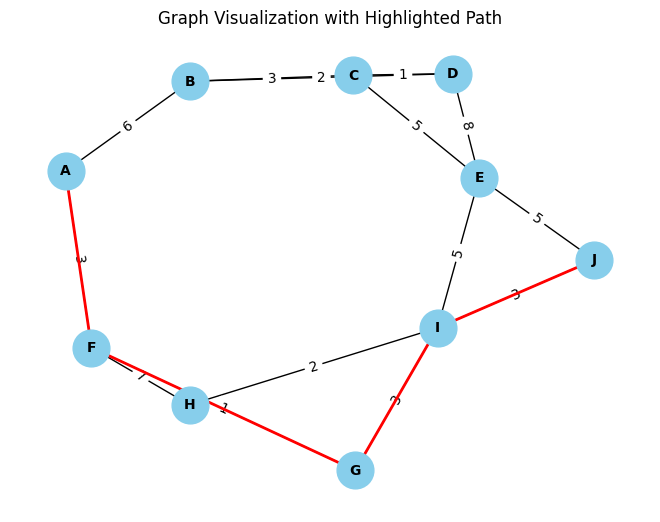

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
#for simplicity we ll consider heuristic distances given
#and this function returns heuristic distance for all nodes
def heuristic(n):
    H_dist = {
        'A': 10,
        'B': 6,
        'C': 5,
        'D': 7,
        'E': 3,
        'F': 6,
        'G': 5,
        'H': 3,
        'I': 1,
        'J': 0
    }
    return H_dist[n]

#Describe your graph here
Graph_nodes = {
    'A': [('B', 6), ('F', 3)],
    'B': [('A', 6), ('C', 3), ('D', 2)],
    'F': [('A', 3), ('G', 1), ('H', 7)],
    'C': [('B', 3), ('D', 1), ('E', 5)],
    'D': [('B', 2), ('C', 1), ('E', 8)],
    'E': [('C', 5), ('D', 8), ('I', 5), ('J', 5)],
    'G': [('F', 1), ('I', 3)],
    'H': [('F', 7), ('I', 2)],
    'I': [('E', 5), ('G', 3), ('H', 2), ('J', 3)],
}

aStarAlgo('A', 'J')
# Create a directed graph
G = nx.Graph()

# Add nodes and edges to the graph
for node, neighbors in Graph_nodes.items():
    G.add_node(node)
    for neighbor, weight in neighbors:
        G.add_edge(node, neighbor, weight=weight)

# Define the path found by the algorithm
path = ['A', 'F', 'G', 'I', 'J']

# Draw the graph with the path highlighted
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes and edges without highlighting the path
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
edge_labels = {(n1, n2): d['weight'] for n1, n2, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Highlight the path
path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.0)

# Display the graph
plt.title('Graph Visualization with Highlighted Path')
plt.show()

#3

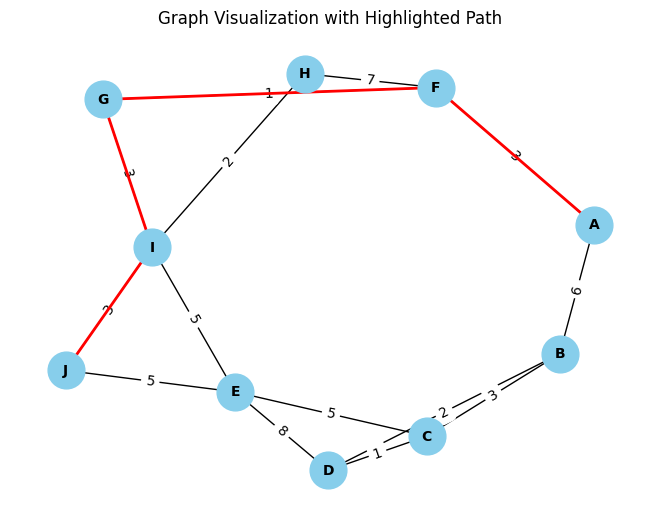

In [ ]:


# Define the graph structure
Graph_nodes = {
    'A': [('B', 6), ('F', 3)],
    'B': [('A', 6), ('C', 3), ('D', 2)],
    'C': [('B', 3), ('D', 1), ('E', 5)],
    'D': [('B', 2), ('C', 1), ('E', 8)],
    'F': [('A', 3), ('G', 1), ('H', 7)],
    'G': [('F', 1), ('I', 3)],
    'H': [('F', 7), ('I', 2)],
    'E': [('C', 5), ('D', 8), ('I', 5), ('J', 5)],
    'I': [('E', 5), ('G', 3), ('H', 2), ('J', 3)],
}




#4 SImplified distance points visualization

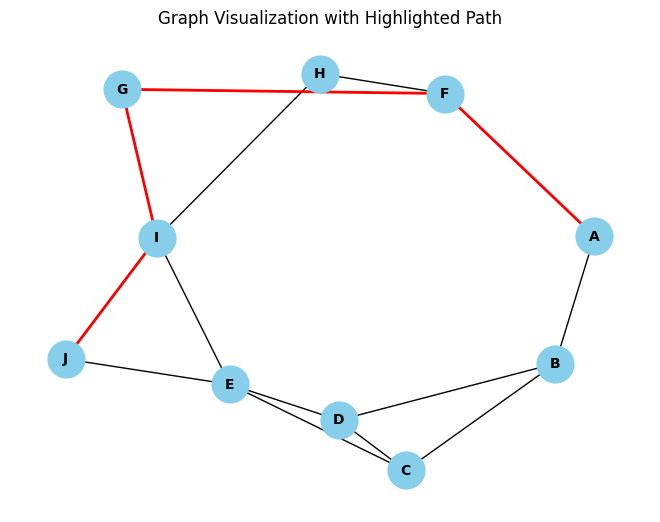

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph structure
Graph_nodes = {
    'A': [('B', 6), ('F', 3)],
    'B': [('A', 6), ('C', 3), ('D', 2)],
    'C': [('B', 3), ('D', 1), ('E', 5)],
    'D': [('B', 2), ('C', 1), ('E', 8)],
    'E': [('C', 5), ('D', 8), ('I', 5), ('J', 5)],
    'F': [('A', 3), ('G', 1), ('H', 7)],
    'G': [('F', 1), ('I', 3)],
    'H': [('F', 7), ('I', 2)],
    'I': [('E', 5), ('G', 3), ('H', 2), ('J', 3)],
}

# Define the path found by the algorithm
path = ['A', 'F', 'G', 'I', 'J']

# Create a directed graph
G = nx.Graph()

# Add nodes and edges to the graph
for node, neighbors in Graph_nodes.items():
    G.add_node(node)
    for neighbor, weight in neighbors:
        G.add_edge(node, neighbor, weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")

# Highlight the path
path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.0)

# Display the graph
plt.title('Graph Visualization with Highlighted Path')
plt.show()
